# EQUITY DIGITAL ASSET-OR-NOTHING EUROPEAN OPTION

Valuation and Risk of Equity Digital Options that have their barrier observed at expiry only.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:58 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Asset-or-Nothing Digital Option

I define a digital call and a digital put option.

In [3]:
underlyingType = FinDigitalOptionTypes.ASSET_OR_NOTHING

In [4]:
expiryDate = FinDate(1, 1, 2008)

In [5]:
strikePrice = 65.0

In [6]:
digitalCall = FinEquityDigitalOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL, underlyingType)

In [7]:
digitalPut = FinEquityDigitalOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT, underlyingType)

In [8]:
print(digitalCall)

OBJECT TYPE: FinEquityDigitalOption
EXPIRY DATE: TUE 01 JAN 2008
BARRIER LEVEL: 65.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
UNDERLYING TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


In [9]:
print(digitalPut)

OBJECT TYPE: FinEquityDigitalOption
EXPIRY DATE: TUE 01 JAN 2008
BARRIER LEVEL: 65.0
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT
UNDERLYING TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


## Valuation

In [10]:
valueDate = FinDate(1, 7, 2007)

In [11]:
interestRate = 0.07

In [12]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [13]:
volatility = 0.27

In [14]:
model = FinEquityModelBlackScholes(volatility)

In [15]:
stockPrice = 70.0
dividendYield = 0.05

In [16]:
digitalCall.value(valueDate, stockPrice, discountCurve, dividendYield, model)

48.03177047945803

In [16]:
digitalPut.value(valueDate, stockPrice, discountCurve, dividendYield, model)

20.22589637346212

## Check Monte-Carlo

In [17]:
digitalCall.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, 50000)

48.072486273604504

In [18]:
digitalPut.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, 50000)

20.186613355023177

## Vectorisations

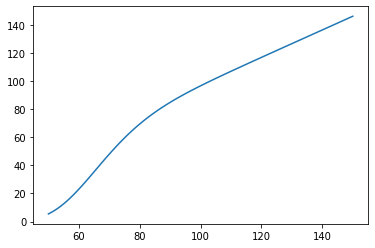

In [22]:
stockPrices = np.linspace(50,150,100)
v = digitalCall.value(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, v);

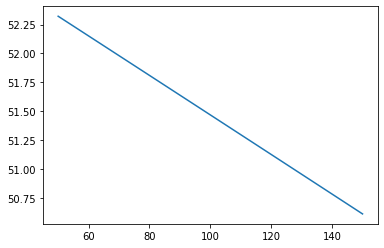

In [23]:
dividendYields = np.linspace(0,0.02,100)
v = digitalCall.value(valueDate, stockPrice, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

We can vectorise two things at the same time as long as they have the same length

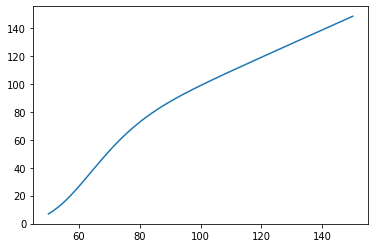

In [24]:
stockPrices = np.linspace(50,150,100)
dividendYields = np.linspace(0, 0.02 , 100)
v = digitalCall.value(valueDate, stockPrices, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

And we can do the same to the option delta.

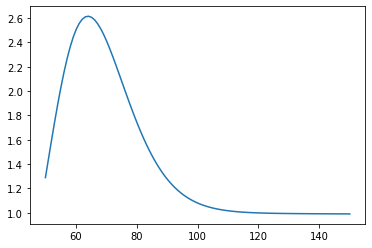

In [25]:
stockPrices = np.linspace(50,150,100)
dividendYields = np.linspace(0, 0.02 , 100)
v = digitalCall.delta(valueDate, stockPrices, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

## Risk Analysis

The analytical model produced the following sensitivities

In [26]:
digitalCall.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

2.4448134812615763

In [27]:
digitalCall.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

-0.044992987113801064

In [28]:
digitalCall.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

8.00792731368869

In [29]:
digitalCall.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

-29.995040553885133

In [30]:
digitalCall.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

62.05421155549118

Copyright (c) 2020 Dominic O'Kane